<a href="https://colab.research.google.com/github/FabioPojo1987/FabioPojo1987-MVP_1_DATA_SCIENCE_PUC_RIO/blob/main/Jogos_Mais_Vendidos_do_Switch_Entre_2018_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analisando o Sucesso do Nintendo Switch

Este é um trabalho acadêmico para fins de conclusão da 1ª Sprint do Curso de Ciência de Dados da PUC-Rio.

Trabalho elaborado pelo aluno Fabio Pojo de Almeida, baseado em dados e informações obtidos no site oficial da Nintendo e em fóruns e revistas de jogos.


#1-Introdução

O Nintendo Switch, é um console de videogame híbrido (pois ele é portátil e também de mesa com o uso da dock), que se assemelha a um tablet. Este aparelho, que atualmente possui 3 versões (Switch Standard, Switch OLED e Switch Lite) foi lançado mundialmente em 03 de março de 2017. Esse aparelho é um dos mais vendidos no mundo. Mas, não irei colocar o número de consoles, pois este projeto se trata sobre o número de vendas de jogos eletrônicos para o Nintendo Switch dentre esses, vou citar os top  10 que já ultrapassaram a marca de um milhão de cópias vendidas.

O dataset utilizado nesse MVP foi montado a partir da combinação de diversos dados baseados nos que a Nintendo divulga em relação às vendas de seus videogames a cada trimestre (dados estes presentes na página da própria Nintendo, acessível em: http://www.nintendo.co.jp/ir/en/finance/hard_soft/index.html).

Quanto às demais outras publicadoras, cuja maioria não compartilha seus reais números de venda por console (apenas fornecem uma estimativa aproximada, logo são dados extraoficiais apenas inseridos para fins de estatística e realização deste trabalho), esta lista consiste principalmente de jogos publicados pela Nintendo.

As vendas de software do Nintendo Switch têm sido impulsionadas por novos lançamentos e vendas consistentes de títulos mais antigos.

Super Mario Odyssey foi o jogo mais vendido de 2017 com cerca de 9 milhões de unidades vendidas.

Já Super Smash Bros. Ultimate foi o jogo mais vendido de 2018 com 12 milhões de unidades vendidas.

Por outro lado, Pokémon Sword e Shield foram os jogos mais vendidos de 2019 com 16 milhões de unidades vendidas.

Mais outro jogo interessante para analisarmos é o Animal Crossing: New Horizons, como sendo o jogo mais vendido de 2020, com 31 milhões de unidades vendidas.

Apesar dessas estatísticas, Mario Kart 8 Deluxe é o jogo mais vendido para o console desde março de 2022.

Partindo dessa ideia, resolvi transformar os dados em gráficos para poder analisar e demonstrar como se deu o crescimento das vendas entre os jogos mais populares para o referido console


#2 - Importando as bibliotecas necessárias para fazermos a análise dos dados

2.1 - Para começarmos, precisamos importar as bibliotecas necessárias para a execução deste notebook Jupyter.

Essas bibliotecas são essenciais para o software rodar e ler as informações sem problemas

In [27]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import datetime as dt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#3 - Carregando o Dataset

url = "https://github.com/FabioPojo1987/FabioPojo1987-MVP_1_DATA_SCIENCE_PUC_RIO/blob/main/best_selling_switch_games.csv"

# 4 - Análise Exploratória

Nesta etapa, iremos mostrar como os dados se dividem e como ilustraremos para dar maior clareza e facilitar a compreensão das informações que serão apresentadas a seguir

4.1 - Listando os "Top 10" dos games mais vendidos por título

In [6]:
df = pd.read_csv('best_selling_switch_games.csv')
df.head(10)

,title,copies_sold,genre,developer,publisher,as_of,release_date
0,Mario Kart 8 Deluxe,48410000.0,Kart racing,Nintendo EPD,Nintendo,2022-09-30,2017-04-28
1,Animal Crossing: New Horizons,40170000.0,Social simulation,Nintendo EPD,Nintendo,2022-09-30,2020-03-20
2,Super Smash Bros. Ultimate,29530000.0,Fighting,Bandai Namco StudiosSora Ltd.,Nintendo,2022-09-30,2018-12-07
3,The Legend of Zelda: Breath of the Wild,27790000.0,Action-adventure,Nintendo EPD,Nintendo,2022-09-30,2017-03-03
4,Pokémon Sword and Shield,25370000.0,Role-playing,Game Freak,The Pokémon CompanyNintendo,2022-09-30,2019-11-15
5,Super Mario Odyssey,24400000.0,Platformer,Nintendo EPD,Nintendo,2022-09-30,2017-10-27
6,Super Mario Party,18350000.0,Party,NDcube,Nintendo,2022-09-30,2018-10-05
7,Pokémon Brilliant Diamond and Shining Pearl,14920000.0,Role-playing,ILCA,The Pokémon CompanyNintendo,2022-09-30,2021-11-19
8,Ring Fit Adventure,14870000.0,Exergamerole-playing,Nintendo EPD,Nintendo,2022-09-30,2019-10-18
9,"Pokémon: Let's Go, Pikachu! and Let's Go, Eevee!",14810000.0,Role-playing,Game Freak,The Pokémon CompanyNintendo,2022-09-30,2018-11-16


4.2 - Plotando o Gráfico dos "10 mais" do Switch, para isso devemos exibir os mesmos

In [4]:
top_10_games = df[['title', 'copies_sold']].sort_values(by=['copies_sold'], ascending = False).head(10)

4.2.1 - Com a informação dos 10 primeiros games do Switch, vamos elaborar o gráfico, propriamente dito:

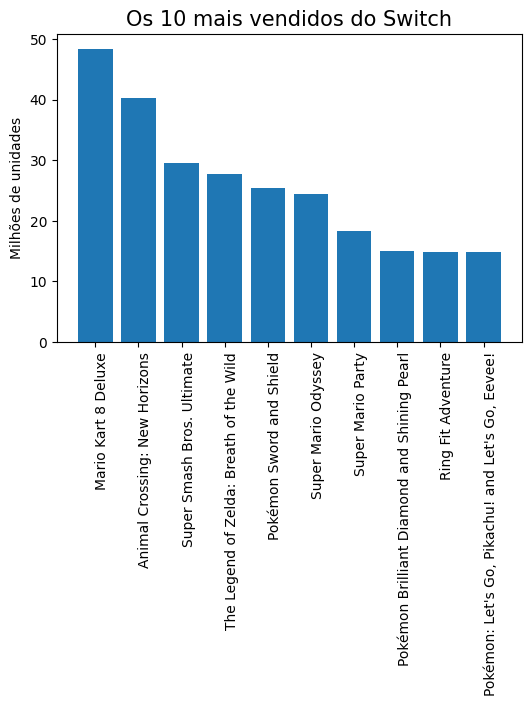

In [30]:
plt.figure(figsize=(6,4))
plt.bar(top_10_games['title'], top_10_games['copies_sold']/1000000)
plt.title('Os 10 mais vendidos do Switch', fontsize = 15)
plt.ylabel('Milhões de unidades')
plt.xticks(rotation = 90, ha ='left')
plt.show()

4.3 -Listando os "Top 5" dos games mais vendidos por gênero de jogo

In [11]:
genre_df = df.groupby('genre').sum().sort_values(by=['copies_sold'], ascending = False).reset_index().head(5)
genre_df

<ipython-input-11-d215f0592f46>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  genre_df = df.groupby('genre').sum().sort_values(by=['copies_sold'], ascending = False).reset_index().head(5)


,genre,copies_sold
0,Role-playing,69940000.0
1,Platformer,63520000.0
2,Action-adventure,52110000.0
3,Kart racing,48410000.0
4,Social simulation,40170000.0


4.3.1 - Plotando o gráfico de gêneros de games mais populares

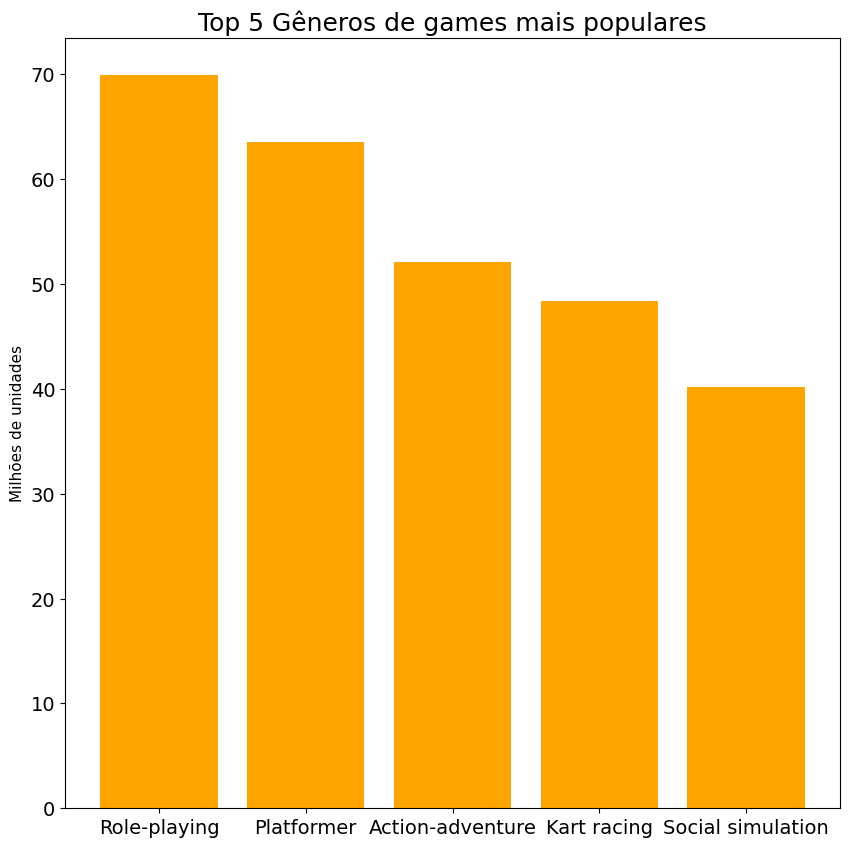

In [32]:
plt.figure(figsize=(10,10))
plt.bar(genre_df['genre'], genre_df['copies_sold']/1000000, color = 'orange')
plt.title('Top 5 Gêneros de games mais populares', fontsize = 18)
plt.ylabel('Milhões de unidades', fontsize = 11)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.show()

In [35]:
df['as_of'] = pd.to_datetime(df['as_of'])
df['year'] = df['as_of'].dt.year.astype('str')

year_df = df.groupby('year').sum().reset_index()
year_df

<ipython-input-35-7eb41f026f67>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year_df = df.groupby('year').sum().reset_index()


,year,copies_sold
0,2018,2000000.0
1,2019,1000000.0
2,2020,5620000.0
3,2021,86260000.0
4,2022,400710000.0


4.4 - Plotando Gráfico em Linha do total global de jogos vendidos

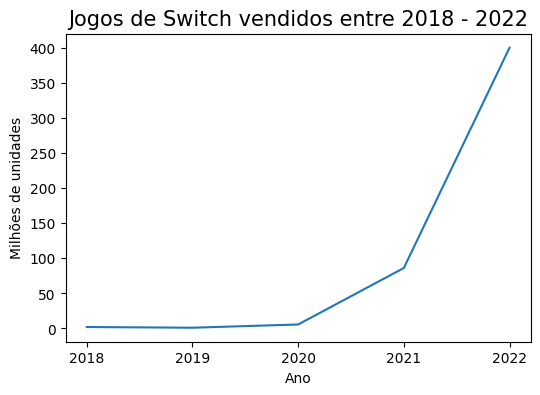

In [20]:
plt.figure(figsize=(6,4))
plt.plot(year_df['year'],year_df['copies_sold']/1000000)
plt.ylabel('Milhões de unidades')
plt.xlabel('Ano')
plt.title('Jogos de Switch vendidos entre 2018 - 2022',fontsize = 15)
plt.show()

4.4.1 -  Total Global de cópias vendidas por Produtora

In [34]:
developer_df = df.groupby('developer').sum().sort_values(by=['copies_sold'], ascending = False).reset_index()
developer_df

<ipython-input-34-b5ca8fc825fd>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  developer_df = df.groupby('developer').sum().sort_values(by=['copies_sold'], ascending = False).reset_index()


,developer,copies_sold
0,Nintendo EPD,226110000.0
1,Game Freak,64090000.0
2,NDcube,30640000.0
3,Bandai Namco StudiosSora Ltd.,29530000.0
4,ILCA,14920000.0
5,Next Level Games,13600000.0
6,HAL Laboratory,9250000.0
7,Nintendo,9070000.0
8,Capcom,8900000.0
9,Grezzo,7760000.0


4.4.2- Listando por desenvolvedores de software

In [36]:
developer_list = developer_df['developer'].head(5).to_list()
developer_list.append('Other developer')

copies_sold_list = developer_df['copies_sold'].head(5).to_list()
other_developer_copies_sold = developer_df['copies_sold'].sum() - developer_df['copies_sold'].head(5).sum()
copies_sold_list.append(other_developer_copies_sold)

df_top_5_and_other_developer_sales = pd.DataFrame(list(zip(developer_list,copies_sold_list)), columns = ['developer', 'copies_sold'])
df_top_5_and_other_developer_sales

,developer,copies_sold
0,Nintendo EPD,226110000.0
1,Game Freak,64090000.0
2,NDcube,30640000.0
3,Bandai Namco StudiosSora Ltd.,29530000.0
4,ILCA,14920000.0
5,Other developer,130300000.0


4.4.2 - Plotando em gráfico de pizza os 5 maiores desenvolvedores que mais vendem games para o Switch (a partir da tabela anterior)

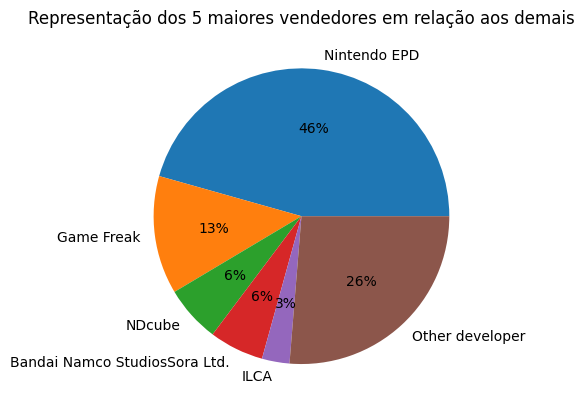

In [26]:
plt.plot(figsize = (15,15))
plt.pie(df_top_5_and_other_developer_sales['copies_sold'],labels = df_top_5_and_other_developer_sales['developer'], autopct='%.0f%%')
plt.title("Representação dos 5 maiores vendedores em relação aos demais")
plt.show()

#5- Conclusão


Podemos observar que, ao analisar os dados, vimos que a maioria dos jogos vendidos são jogos da própria Nintendo e/ou de suas subsidiárias. Haja vista que a mesma empresa possui informações mais confiáveis sobre as vendas de jogos para seu console.

Por outro lado, entende-se que as demais empresas não costumam divulgar tanto quanto porque estas distribuem jogos para as concorrentes da Nintendo,  o que dificulta sabermos o número real de vendas.

Apenas tendo alguma estimativa, dá para termos uma ideia de quais jogos possuem mais apelo popular, quais mais aclamados pela crítica, pelos gêneros de jogos podemos saber qual fatia dos jogadores é a que mais compra e que gera mais lucros para as produtoras.

Essas informações ajudam bastante as produtoras e vendedores qual nicho eles devem investir mais e a quantas andam a diversificação de seus produtos.

